# Kyrie and Lebron Assists Analysis 


### Question 2: Russell Westbrook and Kyrie Iriving are traded for one another, calculate the apg of Lebron and Kyrie 


So in this discussion there are 3 players at review: 
- Lebron James 
- Kyrie Irving 
- Russell Westbrook 

Given the trade at hand we are discussing includes: 
- Russell Westbrook from the LA Lakers to the Nets 
- Kyrie from the Nets to the Lakers


Lets begin our analysis by filtering our data for data that includes 
- Nets and Lakers 
- Kyrie and Lebron in playerName2 (this represents assists)
    - Lebron assists 
    - Lebron average assists 
    - Kyrie assists 
    - Kyrie Average assists 
    - how many of lebrons assists are to russ 


In [98]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [99]:
#Read 
df = pd.read_csv('nba_data_modeling_engineer.csv')

In [100]:
players_of_interest = ["Kyrie Irving", "LeBron James"]

# Use DataFrame's filtering capabilities
# Check for player names in relevant columns (assuming player name columns contain 'namePlayer2')
player_columns = df.columns[df.columns.str.contains("namePlayer2", case=False)]

# Create a boolean mask for rows that contain any of the specified player names
player_mask = (
    df[player_columns]
    .apply(lambda col: col.astype(str).isin(players_of_interest))
    .any(axis=1)
)

# Filter the DataFrame for these rows
filtered_players_df = df[player_mask]

# Further filter for assist events (assuming 'numberEventMessageType' indicates assist events)
filtered_assist_events = filtered_players_df[
    filtered_players_df["numberEventMessageType"] == 1
]

This excludes all events that are not associated with Lebron and Kyries assists, now lets calculate the total number of assists of each player across the season and the average number of assists per game along with how many games they played 


In [101]:
lebron_id = filtered_assist_events[filtered_assist_events["namePlayer2"] == "LeBron James"].iloc[0]["idPlayerNBA2"]
kyrie_id = filtered_assist_events[filtered_assist_events["namePlayer2"] == "Kyrie Irving"].iloc[0]["idPlayerNBA2"]
russ_id = filtered_assist_events[filtered_assist_events["namePlayer1"] == "Russell Westbrook"].iloc[0]["idPlayerNBA1"]

def calculate_games_played(player_id, df):
    player_games = df[df["idPlayerNBA2"] == player_id]["idGame"].nunique()
    return player_games


def calculate_total_assists(player_id, df):
    total_assists = df[df["idPlayerNBA2"] == player_id].shape[0]
    return total_assists


# Function to calculate the average assists per game by a player
def calculate_average_assists(player_id, df):
    total_assists = calculate_total_assists(player_id, df)
    games_played = calculate_games_played(player_id, df)

    if games_played > 0:
        average_assists = total_assists / games_played
    else:
        average_assists = 0
    return average_assists


lebron_total_games = calculate_games_played(lebron_id, filtered_assist_events)
kyrie_total_games = calculate_games_played(kyrie_id, filtered_assist_events)
lebron_total_assists = calculate_total_assists(lebron_id, filtered_assist_events)
kyrie_total_assists = calculate_total_assists(kyrie_id, filtered_assist_events)
lebron_average_assists = calculate_average_assists(lebron_id, filtered_assist_events)
kyrie_average_assists = calculate_average_assists(kyrie_id, filtered_assist_events)

print(f"{'Player':<20}{'Games Played':<15}{'Total Assists':<15}{'Average Assists':<15}")
print(
    f"{'LeBron James':<20}{lebron_total_games:<15}{lebron_total_assists:<15}{lebron_average_assists:<15.2f}"
)
print(
    f"{'Kyrie Irving':<20}{kyrie_total_games:<15}{kyrie_total_assists:<15}{kyrie_average_assists:<15.2f}"
)

Player              Games Played   Total Assists  Average Assists
LeBron James        56             349            6.23           
Kyrie Irving        29             167            5.76           


This process just allows us to understand how Lebron and Kyrie impacted their respective teams with assists, the interesting part of this analysis is how can we accurately create depictions due to the fact that Kyrie played 51% of the games Lebron played so that in itself is a constraint of having this one dataset, as 29 games is a little tough to judge the makeup of how his full season impact would be on the lakers. 

We haven't seen Kyrie and LeBron play since their title at the Cavs, and given their dynamic at the Cavaliers, based on StatMuse (https://www.statmuse.com/nba/ask/kyrie-irving-stats-with-lebron-in-cavs) (I figured pulling this fact out is ok as its a small comparison and is not being used in the analysis using the 21-22 dataset)

here is the assists per game of Kyrie and Lebron on that team together: 
Kyrie Irving with Lebron on the Cavs in 183 games: 8.3 APG on 34.6 MPG
Lebron James with Kyrie on the Cavs in 183 games: 7.8 APG on 36.5 MPG

Now lets see what percentage of LeBrons assists at the Lakers was to Russell Westbrook 




In [102]:
russ_assisted_by_lebron_df = filtered_assist_events[(filtered_assist_events["idPlayerNBA1"] == russ_id) & (filtered_assist_events["idPlayerNBA2"] == lebron_id)]
russ_assisted_by_lebron_total = russ_assisted_by_lebron_df.shape[0]
russ_points_from_lebron = (
    russ_assisted_by_lebron_df["shotPtsHome"].sum()
    + russ_assisted_by_lebron_df["shotPtsAway"].sum()
)

percentage_russ_of_lebron_total_assists = (
    (russ_assisted_by_lebron_total / lebron_total_assists) * 100
)
games_shared_by_lebron_russ = filtered_assist_events[
    (filtered_assist_events["idPlayerNBA1"] == russ_id)
    & (filtered_assist_events["idPlayerNBA2"] == lebron_id)
]

# Get unique game IDs where both players played
shared_game_ids = games_shared_by_lebron_russ["idGame"].unique()
count_shared = len(shared_game_ids)


print(
    f"Total assists from LeBron to Russell Westbrook: {russ_assisted_by_lebron_total}"
)
print(
    f"Total points scored by Russell Westbrook from LeBron's assists: {russ_points_from_lebron}"
)
print(
    f"Percentage of LeBron's assists that are to Russ: {percentage_russ_of_lebron_total_assists}"
)
print(
    f"Total number of games in 2021-22 shared by Russ and Lebron: {count_shared}"
)

Total assists from LeBron to Russell Westbrook: 52
Total points scored by Russell Westbrook from LeBron's assists: 116
Percentage of LeBron's assists that are to Russ: 14.899713467048711
Total number of games in 2021-22 shared by Russ and Lebron: 34


From here we can see that the total number of assists per game to Russell Westbook is about 1.52941176471 per game. Given this relationship we can attempt to use a model as a means of understanding the effect that Kyrie coming to the Lakers would have on LeBrons Assists per game, given our sample size of data is quite narrow, its difficult to pose any incredibly accurate information but lets see how we could do with perhaps a random forest regressor, or linear regression.

After this analysis, we see that of LeBrons 349 total assists across the 2021-22 season, 52 of those was to Russell WestBrook making up ~15 % of his assists. Perhaps this will be useful as Kyrie would directly replace Russell Westbrooks role on the Lakers

Some things to examine closer could be the fact that Russ and Kyrie are drastically different shooters where Kyrie is known to be much more efficient with his shot opportunities which could in turn result in more assists for LeBron 

Lets understand how LeBron and Kyrie were used in the 2021-22 season

In [103]:
# Create a list of player IDs that you want to compare with LeBron
lebron_assists_df = filtered_assist_events[
    filtered_assist_events["idPlayerNBA2"] == lebron_id
]

# Group by the player who received the assist (idPlayerNBA1)
# Count total assists and total games played
assists_per_player = (
    lebron_assists_df.groupby("idPlayerNBA1")
    .agg(total_assists=("idGame", "count"), total_games=("idGame", "nunique"))
    .reset_index()
)

# Calculate assists per game for each player
assists_per_player["assists_per_game"] = (
    assists_per_player["total_assists"] / assists_per_player["total_games"]
)

# Optional: Add player names to the DataFrame for easier interpretation
# Assuming you have a DataFrame of player names and IDs, you can merge them
player_names = df[["idPlayerNBA1", "namePlayer1"]].drop_duplicates()
assists_per_player = assists_per_player.merge(
    player_names, left_on="idPlayerNBA1", right_on="idPlayerNBA1"
)

# Output the result
print(
    assists_per_player[
        ["namePlayer1", "total_assists", "total_games", "assists_per_game"]
    ]
)

print("Average Assist to Players", assists_per_player["assists_per_game"].mean())

            namePlayer1  total_assists  total_games  assists_per_game
0       Carmelo Anthony             48           30          1.600000
1         Dwight Howard             12           12          1.000000
2          Trevor Ariza             11           10          1.100000
3           Rajon Rondo              2            2          1.000000
4     Russell Westbrook             52           34          1.529412
5         D.J. Augustin              4            3          1.333333
6        DeAndre Jordan              6            5          1.200000
7       Darren Collison              2            2          1.000000
8       Wayne Ellington             17           13          1.307692
9         Avery Bradley             24           17          1.411765
10        Isaiah Thomas              1            1          1.000000
11        Anthony Davis             31           16          1.937500
12        Kent Bazemore              5            5          1.000000
13      Stanley John

Here we see that LeBron had an average assist rate of 1.35 Lets now analyze how Kyrie faired on the nets and how his assists per game with the Nets did

In [104]:
# Filter for assists by Kyrie
kyrie_assists_df = filtered_assist_events[
    filtered_assist_events["idPlayerNBA2"] == kyrie_id
]

# Group by the player he assisted
assists_to_teammates = (
    kyrie_assists_df.groupby("idPlayerNBA1")
    .agg(total_assists=("idGame", "count"), total_games=("idGame", "nunique"))
    .reset_index()
)

# Calculate assists per game for each teammate
assists_to_teammates["assists_per_game"] = (
    assists_to_teammates["total_assists"] / assists_to_teammates["total_games"]
).fillna(
    0
)  # Handle division by zero

# Optional: Add player names for easier interpretation (assuming player_names is available)
player_names = df[["idPlayerNBA1", "namePlayer1"]].drop_duplicates()
assists_to_teammates = assists_to_teammates.merge(
    player_names, left_on="idPlayerNBA1", right_on="idPlayerNBA1", how="left"
)

# Output the result
print(
    assists_to_teammates[
        ["namePlayer1", "total_assists", "total_games", "assists_per_game"]
    ]
)

print("Average Assist to Players", assists_per_player["assists_per_game"].mean())

          namePlayer1  total_assists  total_games  assists_per_game
0   LaMarcus Aldridge             11            5          2.200000
1        Kevin Durant             29           14          2.071429
2        Goran Dragic              3            3          1.000000
3       Blake Griffin             15            7          2.142857
4        James Harden              3            3          1.000000
5       James Johnson              3            3          1.000000
6         Patty Mills             23           17          1.352941
7      Andre Drummond             12            9          1.333333
8          Seth Curry             11            8          1.375000
9         Bruce Brown             22           15          1.466667
10        Nic Claxton              8            8          1.000000
11     Day'Ron Sharpe              5            4          1.250000
12    Kessler Edwards              8            7          1.142857
13         Cam Thomas             12            

Kyries Average assist to players was surprisingly also 1.35, but when you understand the dynamic of LeBron as a facilitator vs scorer it holds some similarity to Kyries abilities as well 

For prediction purposes, lets conduct a small ML analysis, the features I am choosing to input are usage rate and minutes played, total team points

Usage Rate can be defined as 
Usage Rate= (FGA + 0.44 x FTA + TO) / (TeamPossessions)

For complexity, I will pull the usage rate and minutes played from StatMuse for my further study of each player and how they may affect LeBron and Kyries assists 

In addition I will be seeing how Minutes played also affects this study in predicting the assist rates of kyrie and lebron 


as shown below 

​
 


In [105]:


# Data for Brooklyn Nets (2021-22 season)
nets_data = {
    "Player": [
        "James Harden",
        "Kyrie Irving",
        "Kevin Durant",
        "LaMarcus Aldridge",
        "Patty Mills",
        "Bruce Brown",
        "Nic Claxton",
        "DeAndre' Bembry",
        "Kessler Edwards",
        "Day'Ron Sharpe",
        "Goran Dragic",
        "James Johnson",
        "Seth Curry",
    ],
    "Minutes per Game": [
        37.2,
        29.8,
        37.2,
        26.4,
        28.8,
        30.0,
        22.0,
        20.6,
        25.0,
        14.1,
        20.4,
        21.5,
        15.0,
    ],
    "Usage Rate (%)": [
        31.5,
        29.5,
        31.6,
        23.2,
        21.3,
        15.8,
        17.2,
        15.4,
        15.0,
        10.0,
        16.2,
        14.9,
        19.8,
    ],
    "Assists per Game": [
        10.3,
        5.5,
        6.1,
        2.5,
        3.4,
        4.6,
        2.8,
        1.2,
        2.0,
        1.0,
        2.3,
        4.2,
        3.5,
    ],
}

# Data for Los Angeles Lakers (2021-22 season)
lakers_data = {
    "Player": [
        "LeBron James",
        "Russell Westbrook",
        "Anthony Davis",
        "Carmelo Anthony",
        "Dwight Howard",
        "Avery Bradley",
        "Malik Monk",
        "Talen Horton-Tucker",
        "Stanley Johnson",
        "Wenyen Gabriel",
        "Kendrick Nunn",
        "Trevor Ariza",
        "Wayne Ellington",
    ],
    "Minutes per Game": [
        37.2,
        34.3,
        31.3,
        29.6,
        21.8,
        24.5,
        29.0,
        28.4,
        22.5,
        18.7,
        19.0,
        24.2,
        20.3,
    ],
    "Usage Rate (%)": [
        31.9,
        30.3,
        30.8,
        25.5,
        20.4,
        14.5,
        23.6,
        24.8,
        15.0,
        11.9,
        20.0,
        18.1,
        16.5,
    ],
    "Assists per Game": [
        6.2,
        8.5,
        2.8,
        1.2,
        1.3,
        2.0,
        2.1,
        4.0,
        1.0,
        0.5,
        1.5,
        1.0,
        1.2,
    ],
}

# Create DataFrames
nets_df = pd.DataFrame(nets_data)
lakers_df = pd.DataFrame(lakers_data)

# Combine DataFrames
combined_df = pd.concat(
    [nets_df.assign(Team="Nets"), lakers_df.assign(Team="Lakers")], ignore_index=True
)

# Calculate the Pearson correlation coefficients
correlation_usage_assists, _ = pearsonr(
    combined_df["Usage Rate (%)"], combined_df["Assists per Game"]
)
correlation_minutes_assists, _ = pearsonr(
    combined_df["Minutes per Game"], combined_df["Assists per Game"]
)

# Output the results
print(
    f"Correlation coefficient (r) between Usage Rate and Assists per Game: {correlation_usage_assists:.4f}"
)
print(
    f"Correlation coefficient (r) between Minutes Played and Assists per Game: {correlation_minutes_assists:.4f}"
)

Pearson correlation coefficient (r) between Usage Rate and Assists per Game: 0.7063
Pearson correlation coefficient (r) between Minutes Played and Assists per Game: 0.7343


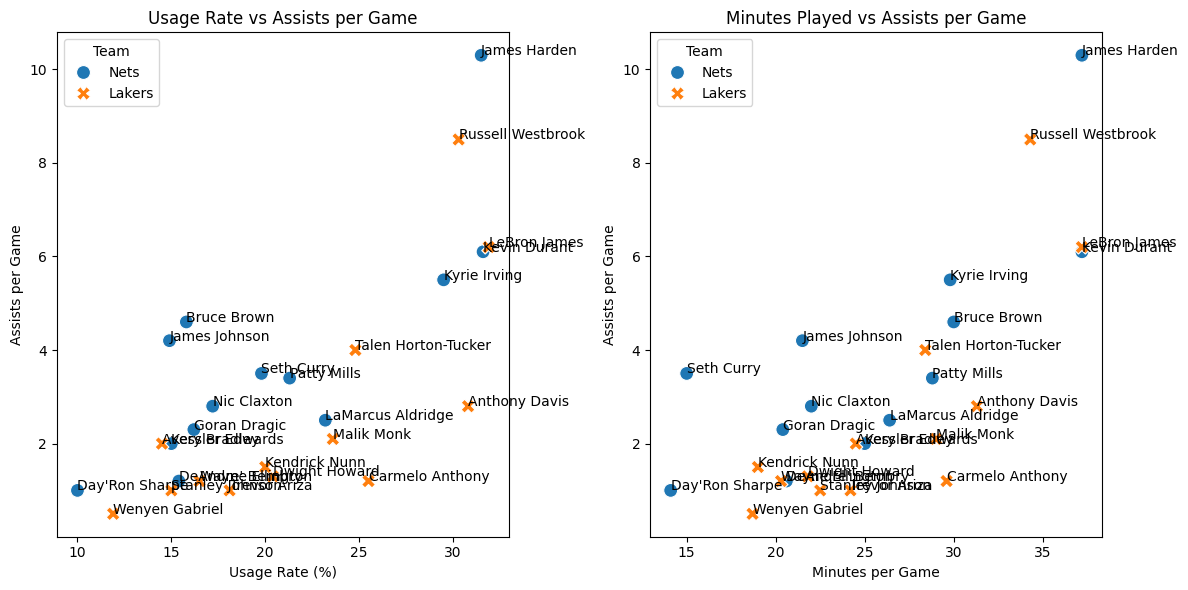

In [109]:

# Visualization
plt.figure(figsize=(12, 6))

# Scatter plot for Usage Rate vs Assists per Game
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=combined_df,
    x="Usage Rate (%)",
    y="Assists per Game",
    hue="Team",
    style="Team",
    s=100,
)
plt.title("Usage Rate vs Assists per Game")
plt.xlabel("Usage Rate (%)")
plt.ylabel("Assists per Game")
for line in range(0, combined_df.shape[0]):
    plt.text(
        combined_df["Usage Rate (%)"].iloc[line],
        combined_df["Assists per Game"].iloc[line],
        combined_df["Player"].iloc[line],
        horizontalalignment="left",
        size="medium",
        color="black",
    )

# Scatter plot for Minutes Played vs Assists per Game
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=combined_df,
    x="Minutes per Game",
    y="Assists per Game",
    hue="Team",
    style="Team",
    s=100,
)
plt.title("Minutes Played vs Assists per Game")
plt.xlabel("Minutes per Game")
plt.ylabel("Assists per Game")
for line in range(0, combined_df.shape[0]):
    plt.text(
        combined_df["Minutes per Game"].iloc[line],
        combined_df["Assists per Game"].iloc[line],
        combined_df["Player"].iloc[line],
        horizontalalignment="left",
        size="medium",
        color="black",
    )

plt.tight_layout()
plt.show()

Doesn't seem like the relationship between the usage rate and minutes fair quite linearly to the resulting data as the coefficients come back as 0.7 so lets conduct this in a random forest regressor 



In [110]:
# Define independent variables and dependent variable
X = combined_df[["Usage Rate (%)", "Minutes per Game"]]
y = combined_df["Assists per Game"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)


# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error: 2.1271666666666658
R-squared: 0.431636392349536


There are definitely many more variables that can be introduced to make this model better such as AST%, Total Team Points, Offensive Efficiency, but lets continue
Now lets use this model to calculate the assists per game by finding the usage rate and minutes per season from the last 10 years of both LeBron and Kyries careers 
and in turn predict the assists per game thanks to StatMuse



In [112]:
# Data for LeBron Jame
lebron_data = {
    "Minutes Played": [2540, 2368, 2388, 2160, 2178, 2143, 2146, 1688, 1859, 1706],
    "Usage Rate (%)": [31.9, 30.1, 30.9, 32.2, 31.3, 29.9, 31.6, 31.5, 31.5, 32.3],
    "Assists Per Game": [
        6.3,
        6.1,
        7.4,
        4.8,
        9.1,
        6.9,
        6.3,
        7.9,
        7.8,
        6.8,
    ]
}

# Data for Kyrie Irving
kyrie_data = {
    "Minutes Played": [1163, 1249, 1658, 1930, 1999, 2198, 2102, 1428, 1255, 1091],
    "Usage Rate (%)": [28.7, 30.2, 28.1, 26.1, 29.5, 30.8, 31.0, 29.6, 32.6, 30.4],
    "Assists Per Game": [5.7, 6.1, 4.7, 4.8, 5.4, 6.4, 6.1, 6.2, 6.0, 4.4]
}

# Create DataFrames
lebron_df = pd.DataFrame(lebron_data)
kyrie_df = pd.DataFrame(kyrie_data)

In [113]:
combined_df = pd.concat([lebron_df, kyrie_df], ignore_index=True)

# Print the combined DataFrame to see the assists per game
print(combined_df)

# Define features and target variable
X = combined_df[["Minutes Played", "Usage Rate (%)"]]
y = combined_df["Assists Per Game"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

    Minutes Played  Usage Rate (%)  Assists Per Game
0             2540            31.9               6.3
1             2368            30.1               6.1
2             2388            30.9               7.4
3             2160            32.2               4.8
4             2178            31.3               9.1
5             2143            29.9               6.9
6             2146            31.6               6.3
7             1688            31.5               7.9
8             1859            31.5               7.8
9             1706            32.3               6.8
10            1163            28.7               5.7
11            1249            30.2               6.1
12            1658            28.1               4.7
13            1930            26.1               4.8
14            1999            29.5               5.4
15            2198            30.8               6.4
16            2102            31.0               6.1
17            1428            29.6            

In [114]:
lebron_usg_average = lebron_df["Usage Rate (%)"].mean()
lebron_minutes_average = lebron_df["Minutes Played"].mean()
kyrie_usg_average = kyrie_df["Usage Rate (%)"].mean()
kyrie_minutes_average = kyrie_df["Minutes Played"].mean()

new_data = pd.DataFrame(
    {
        "Minutes Played": [
            lebron_minutes_average,
            kyrie_minutes_average,
        ],  # Last season's minutes played
        "Usage Rate (%)": [
            lebron_usg_average,
            kyrie_usg_average,
        ],  # Last season's usage rates
    }
)

# Define features and target variable
X = pd.concat(
    [
        lebron_df[["Minutes Played", "Usage Rate (%)"]],
        kyrie_df[["Minutes Played", "Usage Rate (%)"]],
    ]
)
y = pd.concat([lebron_df["Assists Per Game"], kyrie_df["Assists Per Game"]])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions using the new data
predictions = rf_model.predict(new_data)

# Output the predicted assists per game based on the averages
print(f"Predicted Assists Per Game for LeBron: {predictions[0]}")
print(f"Predicted Assists Per Game for Kyrie: {predictions[1]}")

Predicted Assists Per Game for LeBron: 7.024
Predicted Assists Per Game for Kyrie: 5.985999999999995


With this analysis: using random forest regression, we've come to the conclusion that LeBron would potentially rise from 
- Lebron: 6.23 assists to 7.02 assists 
- Kyrie  5.76 assists to 5.96 assists

## Conclusion

Althought I'm not positive that using random forest regression on this data was reasonable it seems using Linear Regression wasn't going to be our most ideal choice as from the get go the r^2 coefficients for both variables showed weakness in correlation to the target variable that was assists per game across the 2021-22 data for both the Lakers and the Nets. I've come to understand that although Russ and Kyrie would most likely be traded and swapped in terms of roles on the team, is difficult to draw an accurate conclusion on just analyzing their individual impacts on the team as they lie in a team based environment where their impact influences other members of the team, so thats a big reason why I went ahead and analyzed the plays not only by the 3 in question but their full rosters 

In improving my analysis, there is a very strong chance that linear regression on this test set would be highly beneficial in analyzing the landscapes of predicting the assists per game if LeBron and Kyrie were once again put on the same team together, but having access to more data and understanding how we can use models to predict the outcomes of these scenarios would be much more reasonable with more of a sample size. I did pull some data from outside resources but mostly 1. For testing the accuracy of my model to an expected result and 2. For saving time as the aggregations I was about to do were directly availabe in those sources. 

In looking at my results, I can say that because Russell Westbrook is not an incredible shooter, it would be reasonable to say that Kyrie would increase LeBron's assists per game as Kyrie's introduction to the team would provide more of an outside scoring threat. A big constraint of the data I've analyzed today with the dataset is that Kyrie having only logged 29 games in the dataset provides a difficult barrier as LeBron has almost double his games for statistical analysis.   

